# Survey Report on Titanic 

Titanic was a famous Bristish passenger ship that sank in 15 April 1912 in the North Altantic Ocean. There were an estimated 1500 death among 2300 passengers and crew members on board. It was one of the greatest Tragedies in the early 20th century.

We will use the data of passengers provided by Kaggle website, with most of data well maintained. We will use the data analysis general process--Quesion, Loading data, Exploring Data, Conclusion, to analyze the data of passengers in Titanic.


## Questions

In this section, we discuss the questions after briefly read the csv data. Our data set only contains 891 passengers information. But it is big enough for us to analyze our data based on this sample.

It is well known that Titanic hit an iceberg in the south of Newfoundland and cause the tragedy. But nowadays we are able to use the data science technology to analyze the possible survival chance from people's background. When we analyze our data, we find there are 12 columns on csv file, corresponding to different factors of a person's background. It seems that for each factor, it may related to the survive chance of a person on board of Titanic. So
we raise the following questions:

>**Question: Which factors of a person's background will make him/her more chance to survive on Titanic? **

Since there are 12 columns, it corresponding to 12 variables on data set. We briefly introduce the meaning of this columns and select a few that are meanful to analyze the chance of survive rate. The columns are:

|Column Name | Meaning        |
|:------------:|:----------------:|
|PassengeID  | ID |
|Survival    | Survival (0 = No; 1 = Yes)|
|Pclass      |    Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
|Name        |    Name|
|Sex         |    Sex  |
|Age           |    Age|
|Sibsp        |     Number of Siblings/Spouses Aboard|
|Parch        |     Number of Parents/Children Aboard|
|Ticket       |     Ticket Number|
|Fare          |    Passenger Fare|
|Cabin         |    Cabin|
|Embarked      |    Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

When we briefly review the data, we find some data not suitable for analysing the chance of survival since it is obviously not related to the survival chance of passengers, such as PassengeID, Name, Ticket, Embarded. Some other data are related to the survival chance of passengers but lost most of the data, so they can not provide accuracy for data analysis, such as Cabin. For the rest columns, we are interested in analyzing the following relations between survival chance and person's background:

Relation between survival rate with Pclass, which is the passenger class in first class, second class, and third class; 

>**Question1: Will the first class and second class, which are bought by rich people, make him/her more chance to survive on Titanic? **

Relation between survival rate and the sex, which is male and female; 

>**Question2: Will male has more chance to survival? or the female first morality make her more chance to survive on Titanic? **

Relation between survival rate and the age, such as old, adult and child; 

>**Question3: Will children are carefully cared in the evacuation process?**

Relation between survival rate and the fare of ticket, which is the ticket price. This factor may be same as the first one.

>**Question4: Is the person with high cost ticket make him/her survive? **



 





Therefore, we have total four varibles: PClass, Sex, Age, and Fare. All these factors are independent variables. We will use them to relate to Survival, which is dependent variable. 

## Loading Data

In this section we load our data into python IDE and show the head of data set for a brief review.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

titanic_dataframe = pd.read_csv('titanic-data.csv')
titanic_dataframe.head(n = 10)

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


## Explore Data

In this section, we start to explore our data. From the titanic-data.csv file, we find that there are total 891 records. But in histroy there are around 2300 passengers and crew members on board. We also find that there are a lot of miss records in Cabin columns. The age column has some miss data but most data are still recorded. 


In [14]:
print 'Total passengers: {}'.format(len(titanic_dataframe))

Total passengers: 891


###  1. Survival VS PClass

 we find that there are total 549 deaths and 342 survivals.

In [15]:
group_data = titanic_dataframe.groupby('Survived', as_index = False) 
pclass_group_data = group_data['Person'].sum()
print pclass_group_data 

   Survived  Person
0         0     549
1         1     342


We divide the deaths and survivals by PClass.

   Survived  Pclass  Person
0         0       1      80
1         0       2      97
2         0       3     372
3         1       1     136
4         1       2      87
5         1       3     119


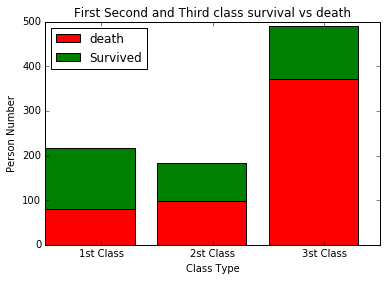

In [4]:
group_data = titanic_dataframe.groupby(['Survived', 'Pclass'], as_index = False) 
sum_group_data = group_data['Person'].sum()
print sum_group_data

person_data = sum_group_data['Person']  

plt.bar([0,1,2], person_data.iloc[0:3], color = 'red', label = 'death')
plt.bar([0,1,2], person_data.iloc[3:6], color = 'green', bottom = person_data.iloc[0:3], label = 'Survived')
plt.xticks([0.5, 1.5, 2.5], ['1st Class','2st Class','3st Class'])
plt.xlabel('Class Type')
plt.ylabel('Person Number')
plt.title('First Second and Third class survival vs death')
plt.legend(loc = 'upper left')

### 2. Survival VS Sex

We devide the death and survival on category of sex

   Survived     Sex  Person
0         0  female      81
1         0    male     468
2         1  female     233
3         1    male     109


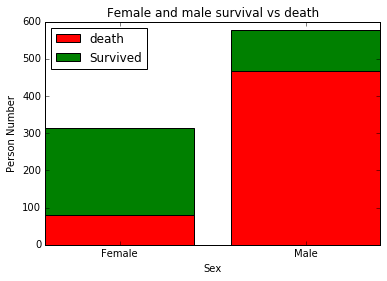

In [5]:
group_data = titanic_dataframe.groupby(['Survived', 'Sex'], as_index = False) 
sum_group_data = group_data['Person'].sum()
print sum_group_data

person_data = sum_group_data['Person']  

plt.bar([0,1], person_data.iloc[0:2], color = 'red', label = 'death')
plt.bar([0,1], person_data.iloc[2:4], color = 'green', bottom = person_data.iloc[0:2], label = 'Survived')
plt.xticks([0.4, 1.4], ['Female','Male'])
plt.xlabel('Sex')
plt.ylabel('Person Number')
plt.title('Female and male survival vs death')
plt.legend(loc = 'upper left')


### 3. Survival VS Age

We analyze the age of survival. We first give the distribution of ages of all passenger. We can see that most passengers are between 20-40. Then we analyze the survival vs death age distribution using box plot. Finally, we compare the child survival chance with adult survival chance. 

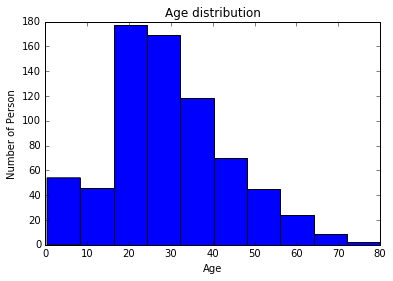

In [6]:
age = titanic_dataframe['Age'].dropna(axis = 0, how = 'any')

plt.hist(age)
plt.xlabel('Age')
plt.ylabel('Number of Person')
plt.title('Age distribution')



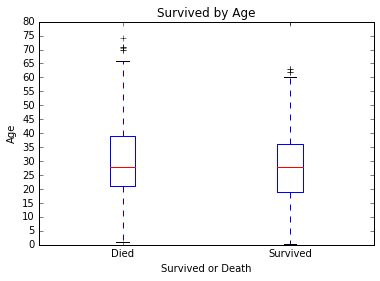

In [7]:

survive_age = titanic_dataframe[['Survived','Age']].dropna(axis = 0, how = 'any')

survive = survive_age['Survived']
age = survive_age['Age']

survived = age[survive == 1]
died = age[survive == 0]
 
bp = plt.boxplot([died, survived])
plt.xticks([1,2],['Died', 'Survived'])
plt.yticks(np.arange(0,85,5))
plt.xlabel('Survived or Death')
plt.ylabel('Age') 
plt.title("Survived by Age")



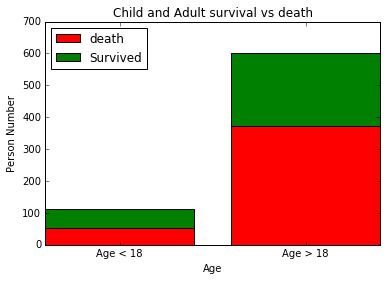

In [8]:
survive_info = [0,0,0,0] 

for i in np.arange(len(survive_age)): 
    if survive.iloc[i] == 0 and age.iloc[i] < 18.:
        survive_info[0] += 1
    elif survive.iloc[i] == 0 and age.iloc[i] >= 18.:
        survive_info[1] += 1
    elif survive.iloc[i] == 1 and age.iloc[i] < 18.:
        survive_info[2] += 1
    else:
        survive_info[3] += 1

plt.bar([0,1], survive_info[0:2], color = 'red', label = 'death')
plt.bar([0,1], survive_info[2:4], color = 'green', bottom = survive_info[0:2], label = 'Survived')
plt.xticks([0.4, 1.4], ['Age < 18','Age > 18'])
plt.xlabel('Age')
plt.ylabel('Person Number')
plt.title('Child and Adult survival vs death')
plt.legend(loc = 'upper left')

### 4. Survival VS Fare

We use box plot to measure the fare of survived group and dead group.

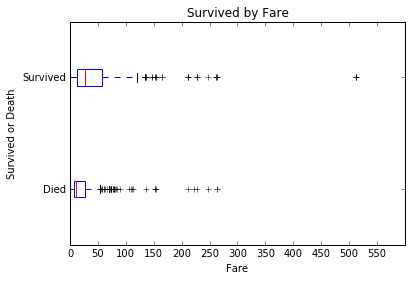

In [9]:

survive_fare = titanic_dataframe[['Survived','Fare']]

survive = survive_fare['Survived']
fare = survive_fare['Fare']

survived = fare[survive == 1]
died = fare[survive == 0]
 
bp = plt.boxplot([died, survived], patch_artist=True, vert=0)
 
    

plt.yticks([1,2],['Died', 'Survived'])
plt.xticks(np.arange(0,600,50))
plt.ylabel('Survived or Death')
plt.xlabel('Fare') 
plt.title("Survived by Fare")



## Conclusion

To conclude our work, we find the possible relation between PClass, Sex, Age, Fare and the survival chance. From the diagram *First, second and third class survival vs death*, we find that the first class has the highest survival rate, while the third class has the lowest survival rate; From the diagram *Female and male survival vs death*, we find that the female passengers has much higher chance of survive than the male passenger; From the diagram *Survived by age* and *Child and adult survival vs death*, we find the survived people tend to be young adult and the children has more chance to survive than adult; From the diagram *Survived by fare*, we find the survived group tend to pay more than the death group.




The limit of data set is there are only 891 records available in our data sets. We only get a small piece of sample data set instead of population. This maybe caused by the loss of history record, or unrecorded passenger or crew information due to proverty or low social rank. The difference between the sample and the population, we don't know how the sample was chosen from the actual population of people that were on the Titanic. There could have been some sort of intentional or unintentional bias in how the sample was selected.